https://www.youtube.com/watch?v=2n1nFbNf_5g  
https://www.kaggle.com/competitions/big-data-analytics-certification-kr-2023-5th/

빅데이터 분석기사 5회 실기 기출 유형  
  
<문제>  
[가격 예측] 중고 자동차  
자동차 가격을 예측해주세요!  
예측할 값(y): price  
평가: RMSE (Root Mean Squared Error)  
data: train.csv, test.csv  



[컴피티션 제출 양식] 리더보드 제출용  
제출 형식: submission.csv파일을 아래와 같은 형식(수치형)으로 제출  
(id는 test의 index임)  
&nbsp;  
id,price  
0,11000  
1,20500  
2,19610  
...    
1616,11995  

[실제 시험용 제출 양식] 참고  
제출 형식: result.csv파일을 아래와 같은 형식(수치형)으로 제출
&nbsp;  
pred  
11000  
20500  
19610  
...    
11995  

- 답안 제출 참고  
pd.read_csv('result.csv') 로 제출 코드 확인 가능

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 데이터 불러오기
import pandas as pd

path_dir = './content/drive/MyDrive/data_BDC/car_price_BDC2023-5th/'
train = pd.read_csv(path_dir + 'train.csv')
test = pd.read_csv(path_dir + 'test.csv')

## EDA
print(train.shape, test.shape)
display(train.head(5), test.head(5))

(3759, 9) (1617, 8)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,EcoSport,2017,10298,Manual,25013,Petrol,150,53.3,1.0
1,Focus,2016,10491,Manual,30970,Diesel,0,74.3,1.5
2,S-MAX,2017,13498,Manual,60200,Diesel,150,56.5,2.0
3,Fiesta,2018,10600,Manual,27380,Petrol,145,56.5,1.0
4,Fiesta,2018,11000,Manual,7724,Petrol,145,65.7,1.0


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,S-MAX,2016,Manual,23905,Diesel,125,56.5,2.0
1,Fiesta,2018,Manual,16895,Petrol,145,40.3,1.5
2,Kuga,2017,Manual,12109,Petrol,165,45.6,1.5
3,Kuga,2018,Semi-Auto,13940,Diesel,145,58.9,1.5
4,Fiesta,2013,Manual,31690,Petrol,30,54.3,1.2


In [5]:
print(train.info(), train.describe())
print(test.info(), test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3759 entries, 0 to 3758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3759 non-null   object 
 1   year          3759 non-null   int64  
 2   price         3759 non-null   int64  
 3   transmission  3759 non-null   object 
 4   mileage       3759 non-null   int64  
 5   fuelType      3759 non-null   object 
 6   tax           3759 non-null   int64  
 7   mpg           3759 non-null   float64
 8   engineSize    3759 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 264.4+ KB
None               year         price        mileage          tax          mpg  \
count  3759.000000   3759.000000    3759.000000  3759.000000  3759.000000   
mean   2016.887736  12353.321362   23191.786379   114.444001    57.793083   
std       2.151811   4750.338051   19223.258713    61.713682    10.099221   
min    2002.000000   1095.000000       5.000

In [6]:
print(train.describe(include = 'O'), "\n\n", train.describe(include = 'float64'))

          model transmission fuelType
count      3759         3759     3759
unique       19            3        3
top      Fiesta       Manual   Petrol
freq       1372         3234     2541 

                mpg   engineSize
count  3759.000000  3759.000000
mean     57.793083     1.352807
std      10.099221     0.437130
min      20.900000     0.000000
25%      52.300000     1.000000
50%      58.900000     1.200000
75%      65.700000     1.500000
max     201.800000     5.000000


In [7]:
test['transmission'].value_counts()

transmission
Manual       1385
Automatic     127
Semi-Auto     105
Name: count, dtype: int64

<Axes: >

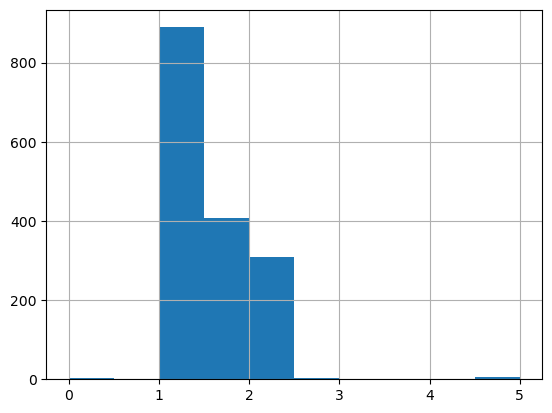

In [8]:
test['engineSize'].hist()

In [9]:
print(test.isnull().sum())

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [10]:
print(train.columns)
## 'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'

y_train = train.pop("price")
display(y_train)

print(train.columns)
## 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize'

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


0       10298
1       10491
2       13498
3       10600
4       11000
        ...  
3754    10495
3755    17991
3756     6830
3757    11500
3758     8295
Name: price, Length: 3759, dtype: int64

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')


In [11]:
## 수치형 데이터 활용
cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,EcoSport,2017,Manual,25013,Petrol,150,53.3,1.0
1,Focus,2016,Manual,30970,Diesel,0,74.3,1.5
2,S-MAX,2017,Manual,60200,Diesel,150,56.5,2.0
3,Fiesta,2018,Manual,27380,Petrol,145,56.5,1.0
4,Fiesta,2018,Manual,7724,Petrol,145,65.7,1.0
...,...,...,...,...,...,...,...,...
3754,Fiesta,2017,Automatic,31597,Petrol,0,57.7,1.0
3755,Kuga,2019,Manual,3961,Diesel,150,45.6,1.5
3756,Ka+,2017,Manual,16207,Petrol,145,57.7,1.2
3757,Fiesta,2018,Manual,9487,Petrol,150,65.7,1.0


In [12]:
## 전처리
## Mapping
list_dict_map = []
for col in list(train.describe(include='object').columns) : ## 범주형 변수 추출 (Mapping 목적)
  list_feature = []
  list_tmp = train[col].unique()
  list_tmp.sort()

  dict_map = {}
  cnt_feature = 0
  for feature in list_tmp :
    dict_map[feature] = cnt_feature
    cnt_feature = cnt_feature + 1

  list_dict_map.append(dict_map)
  train[col] = train[col].map(dict_map)

print(list_dict_map)
train

[{' B-MAX': 0, ' C-MAX': 1, ' EcoSport': 2, ' Edge': 3, ' Fiesta': 4, ' Focus': 5, ' Fusion': 6, ' Galaxy': 7, ' Grand C-MAX': 8, ' Grand Tourneo Connect': 9, ' KA': 10, ' Ka+': 11, ' Kuga': 12, ' Mondeo': 13, ' Mustang': 14, ' Puma': 15, ' S-MAX': 16, ' Tourneo Connect': 17, ' Tourneo Custom': 18}, {'Automatic': 0, 'Manual': 1, 'Semi-Auto': 2}, {'Diesel': 0, 'Hybrid': 1, 'Petrol': 2}]


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2,2017,1,25013,2,150,53.3,1.0
1,5,2016,1,30970,0,0,74.3,1.5
2,16,2017,1,60200,0,150,56.5,2.0
3,4,2018,1,27380,2,145,56.5,1.0
4,4,2018,1,7724,2,145,65.7,1.0
...,...,...,...,...,...,...,...,...
3754,4,2017,0,31597,2,0,57.7,1.0
3755,12,2019,1,3961,0,150,45.6,1.5
3756,11,2017,1,16207,2,145,57.7,1.2
3757,4,2018,1,9487,2,150,65.7,1.0


In [13]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size = 0.2, random_state = 2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((3007, 8), (752, 8), (3007,), (752,))

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [15]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)**0.5

In [16]:
rmse(y_val, pred)

1312.9156241336282

# 수치형+범주형 활용

In [17]:
train = pd.read_csv(path_dir + "train.csv")
test = pd.read_csv(path_dir + "test.csv")

y_train = train.pop("price")

In [18]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [19]:
train
test.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ B-MAX',
       'model_ C-MAX', 'model_ EcoSport', 'model_ Edge', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ S-MAX', 'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(train, y_train, test_size = 0.2, random_state = 2022)
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((3007, 30), (752, 30), (3007,), (752,))

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_tr, y_tr)
pred = rf.predict(x_val)
rmse(y_val, pred)

1307.8595270230376

# Test 예측

In [22]:
pred = rf.predict(test)

## 제출 형식: result.csv파일을 아래와 같은 형식(수치형)으로 제출
result = pd.DataFrame({
    'pred' : pred
})

result.to_csv(path_dir + 'result.csv', index = False)
result

,pred
0,15327.13
1,15965.56
2,14446.28
3,18636.26
4,6318.22
...,...
1612,11603.88
1613,17908.62
1614,10004.11
1615,14371.36
